# Import Dependensi dan Variabel

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

from scipy.interpolate import make_interp_spline

# Import Data

In [147]:
df_gravimetri = pd.read_csv('hasil/ET Aktual Gravimetri.csv')
df_bc = pd.read_csv('hasil/Estimasi ET Blaney-Criddle.csv')
df_hs = pd.read_csv('hasil/Estimasi ET Hargreaves-Samani.csv')
df_pm = pd.read_csv('hasil/Estimasi ET Penman-Monteith.csv')

# Plot Gravimetri

In [148]:
# Menghitung rata-rata harian dari semua tanaman
df_gravimetri['Average_ET'] = df_gravimetri.iloc[:, 1:].mean(axis=1)

# Menghitung Standar Deviasi untuk setiap hari
df_gravimetri['STD_ET'] = df_gravimetri.iloc[:, 1:-1].std(axis=1)

# Menghitung IQR (Interquartile Range) untuk setiap hari
Q1 = df_gravimetri.iloc[:, 1:-2].quantile(0.25, axis=1)
Q3 = df_gravimetri.iloc[:, 1:-2].quantile(0.75, axis=1)
df_gravimetri['IQR_ET'] = Q3 - Q1

# Menghitung median untuk setiap hari
df_gravimetri['Median_ET'] = df_gravimetri.iloc[:, 1:-3].median(axis=1)

df_gravimetri.head()

,Num Day,A1,A2,A3,A4,B1,B2,B3,B4,C1,...,E3,E4,F1,F2,F3,F4,Average_ET,STD_ET,IQR_ET,Median_ET
0,day 05,8.4480,5.0304,8.7360,12.5952,2.173333,4.866667,3.826667,5.533333,10.755918,...,0.622222,0.628148,2.3376,0.8592,1.1616,2.8896,4.857956,3.554066,5.608475,4.346667
1,day 06,1.2084,4.9140,3.9156,6.2004,6.124667,4.524667,4.258000,3.658000,4.935551,...,1.428370,3.863926,0.8940,1.5948,1.1580,2.6268,3.244985,1.642378,2.534689,3.615959
2,day 07,8.1024,7.7664,5.6256,6.6432,5.853333,7.273333,6.346667,5.546667,5.030204,...,4.968889,4.530370,0.0552,1.0680,2.2296,3.1896,4.874327,2.102832,2.560521,5.162449
3,day 08,7.0656,4.2624,6.2208,6.8736,6.653333,8.853333,5.866667,5.120000,5.201633,...,3.591111,4.977778,0.2496,0.5088,0.8640,0.7200,4.676329,2.407098,2.089259,4.978889
4,day 09,5.7612,5.3772,5.6268,6.1836,8.847333,8.047333,7.107333,5.267333,7.662980,...,3.854000,2.891037,0.9204,0.9012,1.3356,1.1076,4.700688,2.237969,2.738228,5.105250


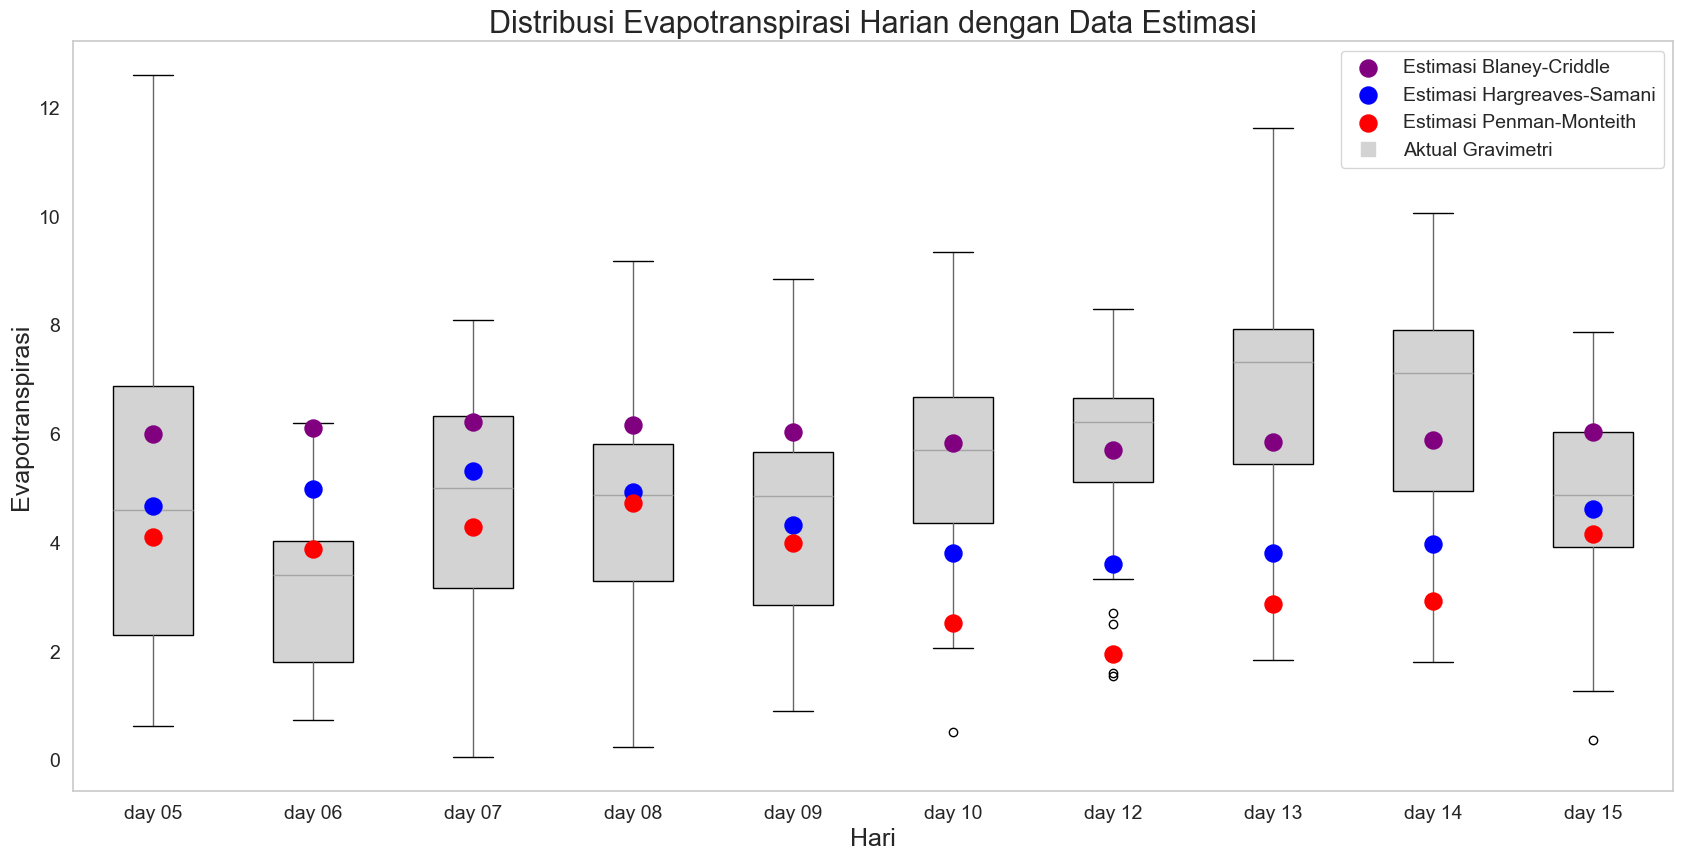

In [149]:
# Convert df_gravimetri to long format
data_aktual_long = df_gravimetri.melt(id_vars=['Num Day'], var_name='Day', value_name='Evapotranspirasi')

# Membuat plot boxplot dengan ukuran besar
fig, ax = plt.subplots(figsize=(20, 10))  # Ukuran figure diperbesar
data_aktual_long.boxplot(by='Num Day', column='Evapotranspirasi', grid=False, patch_artist=True,
                         boxprops=dict(facecolor='lightgray'), ax=ax)

# Tambahkan judul dan label
ax.set_title('Distribusi Evapotranspirasi Harian dengan Data Estimasi', fontsize=22)
ax.set_xlabel('Hari', fontsize=18)
ax.set_ylabel('Evapotranspirasi', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Tambahkan titik estimasi
for idx, day in enumerate(df_gravimetri['Num Day']):
    bc_value = df_bc.loc[df_bc['Num Day'] == day, 'ET Total'].values[0]
    hs_value = df_hs.loc[df_hs['Num Day'] == day, 'ET Total'].values[0]
    pm_value = df_pm.loc[df_pm['Num Day'] == day, 'ET Total'].values[0]

    # Tambahkan titik estimasi ke plot
    ax.scatter(idx + 1, bc_value, color='purple', s=150, label='Estimasi Blaney-Criddle' if idx == 0 else "", zorder=3)
    ax.scatter(idx + 1, hs_value, color='blue', s=150, label='Estimasi Hargreaves-Samani' if idx == 0 else "", zorder=3)
    ax.scatter(idx + 1, pm_value, color='red', s=150, label='Estimasi Penman-Monteith' if idx == 0 else "", zorder=3)

# Tambahkan keterangan boxplot ke legenda
boxplot_patch = plt.Line2D([0], [0], color='lightgray', marker='s', markersize=10, linestyle='None', label='Aktual Gravimetri')
current_handles, current_labels = ax.get_legend_handles_labels()
ax.legend(handles=current_handles + [boxplot_patch], loc='upper right', fontsize=14)

plt.suptitle('')

# Tampilkan plot
plt.show()